In [ ]:
# Characterisation can be done by changing settings to qibolab/runcards/tii1q.yml and examples/tii/diagnostics.yml
# These scripts do not save the characterisation results to the runcard

In [3]:
from qibolab.paths import script_folder, qibolab_folder
from qibolab import Platform
from qibolab.calibration import utils
from qibolab.calibration.calibration import Calibration as Diagnostics

diagnostics_settings = script_folder / "diagnostics.yml"
runcard = qibolab_folder / 'runcards' / 'tii1q.yml' 

# Create a platform; connect and configur e it
platform = Platform('tii1q', runcard)
platform.connect()
platform.setup()

# create a diagnostics/calibration object
ds = Diagnostics(platform, diagnostics_settings)

# select the qubit to be characterised
qubit = 0

[Qibo 0.1.8.dev2|INFO|2022-08-18 16:53:25]: Loading platform tii1q from runcard d:\alvaro\projects\github\qibolab\src\qibolab\runcards\tii1q.yml
[Qibo 0.1.8.dev2|INFO|2022-08-18 16:53:25]: Connecting to tii1q instrument cluster.


Unable to connect:
timed out
Retrying...


[Qibo 0.1.8.dev2|INFO|2022-08-18 16:53:30]: Connecting to tii1q instrument qrm_rf.
[Qibo 0.1.8.dev2|INFO|2022-08-18 16:53:31]: Connecting to tii1q instrument qcm_rf.
[Qibo 0.1.8.dev2|INFO|2022-08-18 16:53:33]: Creating MeasurementControl Calibration
Exception in thread Thread-10:
Traceback (most recent call last):
  File "c:\Users\Alvaro\anaconda3\envs\qibolab\lib\site-packages\quantify_core\visualization\instrument_monitor.py", line 113, in _update
    self.widget.setData(snap["instruments"])
  File "c:\Users\Alvaro\anaconda3\envs\qibolab\lib\site-packages\qcodes\utils\helpers.py", line 439, in __getattr__
    raise AttributeError(
AttributeError: 'InstrumentMonitor' object and its delegates have no attribute 'widget'. Did you mean: 'rwidget'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Alvaro\anaconda3\envs\qibolab\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "c:\Users\Alvaro\anac

In [ ]:
ds.backup_config_file()

Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     11s | time left:      0s  
100% completed | elapsed time:     11s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     15s | time left:      0s  
100% completed | elapsed time:     15s | time left:      0s  

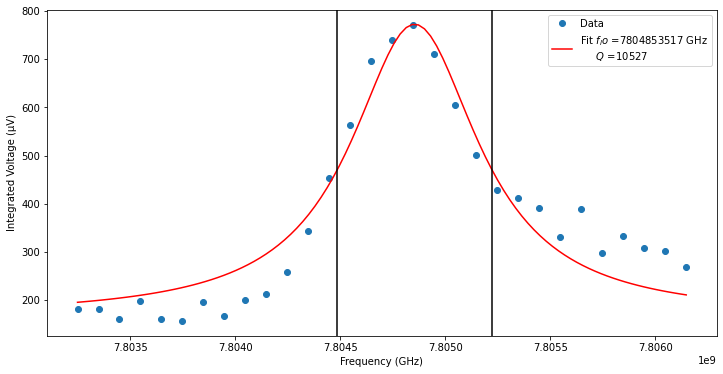


Resonator Frequency = 7824853517


In [4]:
resonator_freq, avg_voltage, peak_voltage, dataset = ds.run_resonator_spectroscopy(qubit)

In [29]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Resonator frequency: {resonator_freq}")
print(f"LO frequency: {resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency']}")

Average voltage: 216
Peak voltage: 879
Resonator frequency: 7824847574
LO frequency: 7804847574


In [ ]:
ds.save_config_parameter("resonator_freq", resonator_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_avg_ro_voltage", int(avg_voltage), 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("state0_voltage", int(peak_voltage), 'characterization', 'single_qubit', qubit)
lo_qrm_frequency = int(resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency'])
ds.save_config_parameter("out0_in0_lo_freq", lo_qrm_frequency, 'instruments', platform.qrm[qubit].name, 'settings')

Resonator Punchout

In [ ]:
dataset = ds.run_resonator_punchout(qubit)

Resonator Spectroscopy Flux

In [ ]:
dataset = ds.run_resonator_spectroscopy_flux(qubit, fluxline = 0)

Qubit Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     37s | time left:      0s  
100% completed | elapsed time:     37s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     32s | time left:      0s  
100% completed | elapsed time:     32s | time left:      0s  

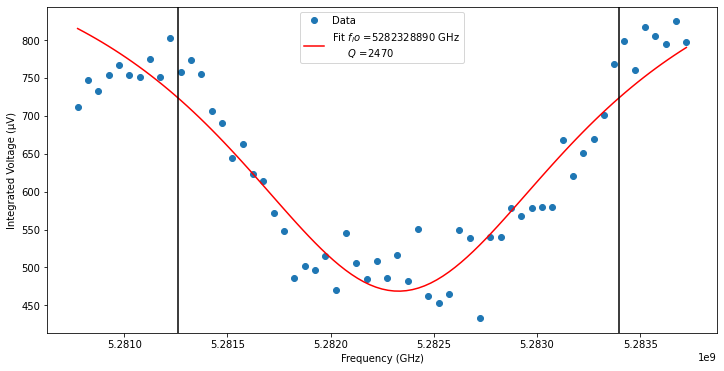


Qubit Frequency = 5082328890


In [2]:
qubit_freq, avg_voltage, peak_voltage, dataset = ds.run_qubit_spectroscopy(qubit)

In [31]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Qubit frequency: {qubit_freq}")
print(f"LO frequency: {qubit_freq - platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']}")

Average voltage: 739
Peak voltage: 0
Qubit frequency: 5082212207
LO frequency: 5282212207


In [ ]:
ds.save_config_parameter("qubit_freq", qubit_freq, 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
ds.save_config_parameter("qubit_spectroscopy_peak_ro_voltage", float(peak_voltage), 'characterization', 'single_qubit', qubit)

Qubit Spectroscopy Flux

In [ ]:
dataset = ds.run_qubit_spectroscopy_flux(qubit, fluxline = 0)

Rabi Oscillations with varying pulse length

Starting iterative measurement...
100% completed | elapsed time:     43s | time left:      0s  
100% completed | elapsed time:     43s | time left:      0s  
Pi pulse duration = 40.16037669847191

Pi pulse amplitude = 0.8695

rabi oscillation peak voltage = 367


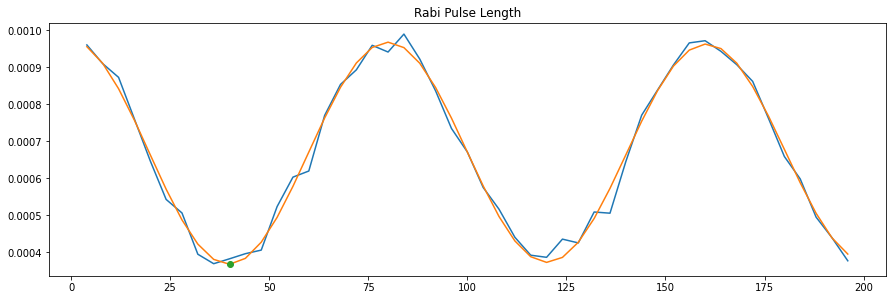

In [4]:
pi_pulse_duration, pi_pulse_amplitude, state1_voltage, dataset = ds.run_rabi_pulse_length(qubit)

In [15]:
print(f"Pi pulse duration: {pi_pulse_duration}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {state1_voltage}")

Pi pulse duration: 85.3298675637468
Pi pulse amplitude: 0.92
Rabi Oscillation pi pulse peak voltage: 350


In [ ]:
ds.save_config_parameter("duration", int(pi_pulse_duration), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("amplitude", float(pi_pulse_amplitude), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("state1_voltage", float(state1_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse gain

Starting iterative measurement...
100% completed | elapsed time:     32s | time left:      0s  
100% completed | elapsed time:     32s | time left:      0s  
Pi pulse gain = 0.3836836042839669

Pi pulse amplitude = 0.8695

Pi pulse duration = 40

rabi oscillation peak voltage = 345


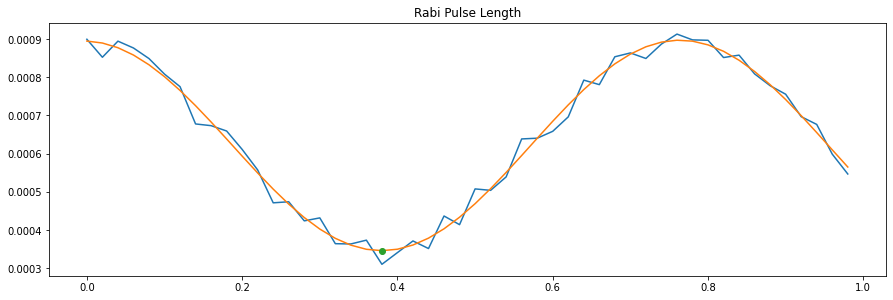

In [6]:
pi_pulse_gain, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_voltage, dataset = ds.run_rabi_pulse_gain(qubit)

In [34]:
dataset['x0'].values[dataset['y0'].argmin().values]

0.38

In [13]:
print(f"Pi pulse gain: {pi_pulse_gain}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {state1_voltage}")

Pi pulse gain: 0.23819567784402343
Pi pulse amplitude: 0.9
Rabi Oscillation pi pulse peak voltage: 497


Rabi Oscillations with varying amplitude

Starting iterative measurement...
100% completed | elapsed time:     32s | time left:      0s  
100% completed | elapsed time:     32s | time left:      0s  
Pi pulse gain = 0.3799859583377838

Pi pulse amplitude = 0.8934553144547135

Pi pulse duration = 40

rabi oscillation peak voltage = 364


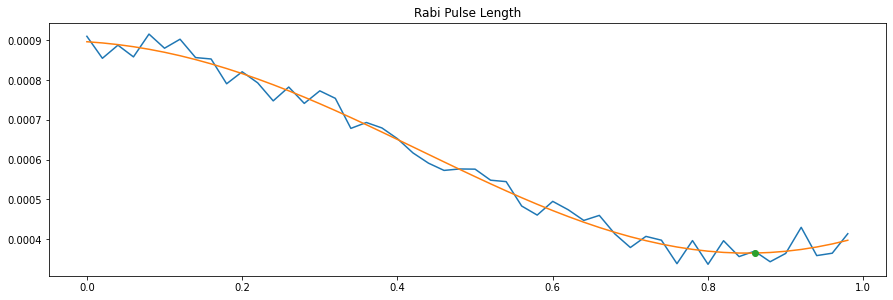

In [8]:
pi_pulse_gain, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_voltage, dataset = ds.run_rabi_pulse_amplitude(qubit)

In [ ]:
print(f"Pi pulse gain: {pi_pulse_gain}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {state1_voltage}")

Rabi Oscillations with varying length and gain

In [ ]:
dataset = ds.run_rabi_pulse_length_and_gain(qubit)

Rabi Oscillations with varying length and amplitude

In [5]:
dataset = ds.run_rabi_pulse_length_and_amplitude(qubit)

Starting iterative measurement...
100% completed | elapsed time:    164s | time left:      0s  
100% completed | elapsed time:    164s | time left:      0s  

T1

Starting iterative measurement...
100% completed | elapsed time:     52s | time left:      0s  
100% completed | elapsed time:     52s | time left:      0s  
T1 = 15550


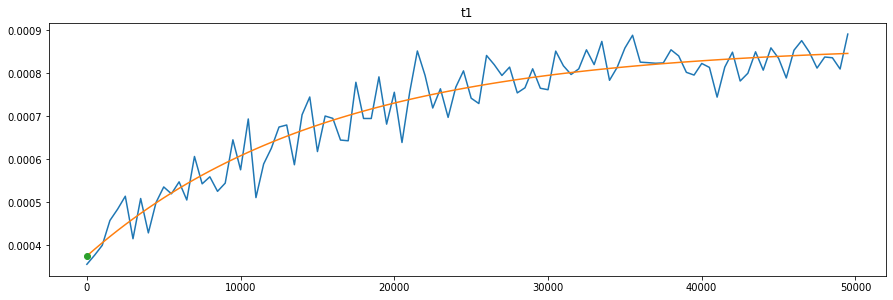

In [10]:
t1, dataset = ds.run_t1(qubit)

In [4]:
print(f"T1: {t1}")

T1: 15640


In [ ]:
ds.save_config_parameter("T1", float(t1), 'characterization', 'single_qubit', qubit)

Ramsey

In [ ]:
delta_frequency, corrected_qubit_frequency, t2, smooth_dataset, dataset = ds.run_ramsey(qubit)

In [22]:
print(f"Delta Frequency: {delta_frequency}")
print(f"Corrected qubit frequency: {corrected_qubit_frequency}")
print(f"T2: {t2}")

Delta Frequency: 1003816.0930581563
Corrected qubit frequency: 5082310985
T2: 9719


In [ ]:
#adjusted_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] + delta_frequency)
ds.save_config_parameter("qubit_freq", corrected_qubit_frequency, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
RX_pulse_sequence = platform.settings['native_gates']['single_qubit'][qubit]['RX']['pulse_sequence']
lo_qcm_frequency = int(corrected_qubit_frequency + RX_pulse_sequence[0]['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_frequency)

Ramsey Frequency Detuned

In [ ]:
t2, delta_phys, corrected_qubit_freq, dataset = ds.run_ramsey_frequency_detuned(qubit)

In [ ]:
print(f"Delta Frequency: {delta_phys}")
print(f"Corrected qubit frequency: {corrected_qubit_freq}")
lo_qcm_frequency = corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']
print(f"Corrected out0_lo_freq: {lo_qcm_frequency}")
print(f"T2: {t2}")

In [ ]:
ds.save_config_parameter("qubit_freq", corrected_qubit_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_freq)

allXY

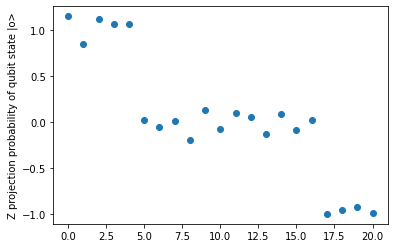

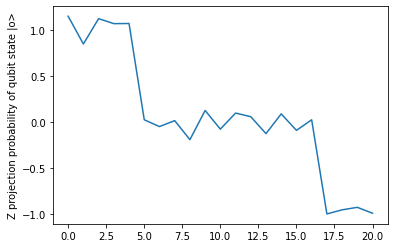

In [14]:
results, gateNumber = ds.run_allXY(qubit)

import matplotlib.pyplot as plt

plt.scatter(gateNumber, results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

#TODO: for consistency move all plotting inside the function

            ["I","I"], 

            ["RX(pi)","RX(pi)"],
            ["RY(pi)","RY(pi)"],    
            ["RX(pi)","RY(pi)"],        
            ["RY(pi)","RX(pi)"],

            ["RX(pi/2)","I"],        
            ["RY(pi/2)","I"],            
            
            ["RX(pi/2)","RY(pi/2)"],            
            ["RX(pi/2)","RY(pi/2)"],                
            
            ["RX(pi/2)","RY(pi)"],                
            ["RY(pi/2)","RX(pi)"],                

            ["RX(pi)","RY(pi/2)"],                
            ["RX(pi)","RX(pi/2)"],                
            
            ["RX(pi/2)","RX(pi)"],                            
            ["RX(pi)","RX(pi/2)"],                
            ["RY(pi/2)","RY(pi)"],                
            ["RY(pi)","RY(pi/2)"],                
            
            ["RX(pi)","I"],  
            ["RY(pi)","I"],           
                 
            ["RX(pi/2)","RX(pi/2)"],                
            ["RY(pi/2)","RY(pi/2)"]    

Drag Pulse Beta Parameter Tunning

[-2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]


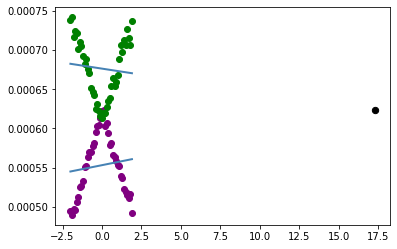

In [15]:
beta_optimal = ds.run_drag_pulse_tunning(qubit)

In [7]:
print(f"Beta optimal: {beta_optimal}")
print(f"Drag Shape: Drag(5, {beta_optimal})")

Beta optimal: -6.68921666051335e-05
Drag Shape: Drag(5, -6.68921666051335e-05)


Flipping

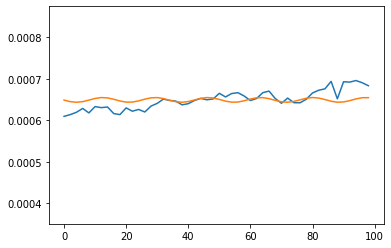

-0.05136869697803853


In [3]:
amplitude_delta = ds.run_flipping(qubit)
print(amplitude_delta)

Readout Pulse Phase 

In [ ]:
#RX(pi) - readout with varying phase from 0 to 2pi
dataset = ds.ro_pulse_phase(qubit)

Dispersive Shift Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     29s | time left:      0s  
100% completed | elapsed time:     29s | time left:      0s  

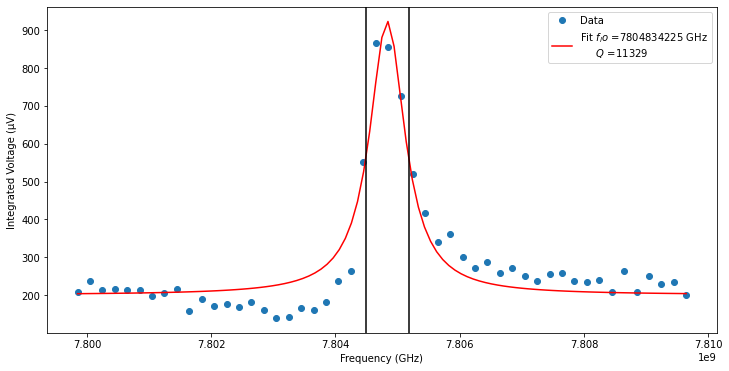

Starting iterative measurement...
100% completed | elapsed time:     30s | time left:      0s  
100% completed | elapsed time:     30s | time left:      0s  

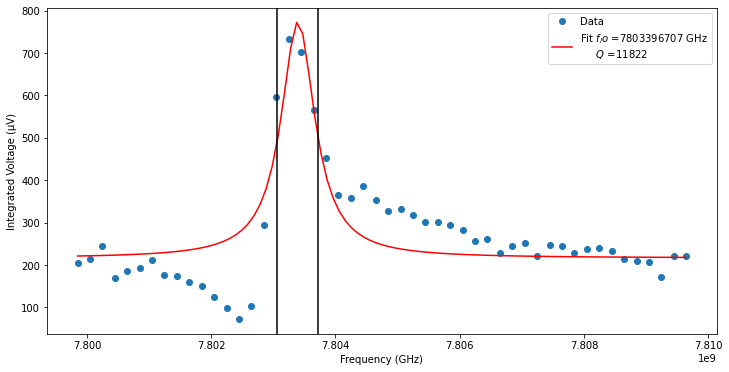


Resonator Frequency = 7824834225

Shifted Frequency = 7823396706

Dispersive Shift = -1437519


In [2]:
shifted_resonator_freq, dispersive_shift, peak_voltage, dataset = ds.run_dispersive_shift(qubit)

Spin Echo

In [ ]:
# Spin Echo: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - readout
dataset = ds.run_spin_echo(qubit)

In [ ]:
# Spin Echo 3 Pulses: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - RX(pi/2) - readout
dataset = ds.run_spin_echo_3pulses(qubit)

Qubit states classification

In [ ]:
all_gnd_states, mean_gnd_states, all_exc_states, mean_exc_states = ds.calibrate_qubit_states(qubit)

In [3]:
mean_gnd_states, mean_exc_states
# TODO: Better print the results

((-5.543255134868772e-05+0.0008975930158821524j),
 (0.0001446400604158933+0.0003369969077198778j))

In [ ]:
utils.plot_qubit_states(all_gnd_states, all_exc_states)

#Classify all points into 0 and 1
classified_gnd_results = []
for point in all_gnd_states: 
    classified_gnd_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

classified_exc_results = []
for point in all_exc_states:
    classified_exc_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

print(classified_gnd_results)
print(classified_exc_results)
# TODO: For consistency move plotting inside the function